In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PairwiseAlignment import pairAlign

In [2]:
df = pd.read_csv("./tmp/DO-051V1-CD24.V.clustalo.fasta.shared-mutations.csv", sep="\t")
print(len(df))
df.head()

102378


,Reference,Antibody 1,Antibody 2,Shared mutations,Perc AB1,Perc AB2
0,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2101:15160:14551|...,2,40.0,16.7
1,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:1119:25273:23416|...,1,20.0,3.7
2,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:1115:6658:10737|D...,0,0.0,0.0
3,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2111:19388:14491|...,0,0.0,0.0
4,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2101:10641:7693|D...,2,40.0,18.2


In [3]:
get_cdr3 = lambda x: x.split("|")[-1].split(",")[0]
df["cdr3_AB1"] = [x for x in map(get_cdr3, df["Antibody 1"])]
df["cdr3_AB2"] = [x for x in map(get_cdr3, df["Antibody 2"])]
df.head()

,Reference,Antibody 1,Antibody 2,Shared mutations,Perc AB1,Perc AB2,cdr3_AB1,cdr3_AB2
0,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2101:15160:14551|...,2,40.0,16.7,CAKKVSQYSSSSLDYWGQGTLVT,CARGNIDGANYFHNWGQGTLVT
1,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:1119:25273:23416|...,1,20.0,3.7,CAKKVSQYSSSSLDYWGQGTLVT,CAKGVRKGGYDLYYFDSWGQGTLVT
2,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:1115:6658:10737|D...,0,0.0,0.0,CAKKVSQYSSSSLDYWGQGTLVT,CAREAQVFDLVKRGPHVDYWGQGTLVT
3,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2111:19388:14491|...,0,0.0,0.0,CAKKVSQYSSSSLDYWGQGTLVT,CAKGYGFDSWGQGTLVT
4,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2101:10641:7693|D...,2,40.0,18.2,CAKKVSQYSSSSLDYWGQGTLVT,CGKSATREIMITFGGVIPPSVWGQGTLVT


In [4]:
pairAlign(df.iloc[0]['cdr3_AB1'], df.iloc[0]['cdr3_AB2']).distance

13

In [5]:
df['cdr3_distance'] = [x.distance for x in map(pairAlign, df['cdr3_AB1'], df['cdr3_AB2'])]
df.head()

,Reference,Antibody 1,Antibody 2,Shared mutations,Perc AB1,Perc AB2,cdr3_AB1,cdr3_AB2,cdr3_distance
0,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2101:15160:14551|...,2,40.0,16.7,CAKKVSQYSSSSLDYWGQGTLVT,CARGNIDGANYFHNWGQGTLVT,13
1,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:1119:25273:23416|...,1,20.0,3.7,CAKKVSQYSSSSLDYWGQGTLVT,CAKGVRKGGYDLYYFDSWGQGTLVT,11
2,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:1115:6658:10737|D...,0,0.0,0.0,CAKKVSQYSSSSLDYWGQGTLVT,CAREAQVFDLVKRGPHVDYWGQGTLVT,14
3,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2111:19388:14491|...,0,0.0,0.0,CAKKVSQYSSSSLDYWGQGTLVT,CAKGYGFDSWGQGTLVT,10
4,IGHV3-23*01,M02984:889:000000000-JGK5F:1:1117:19428:18082|...,M02984:889:000000000-JGK5F:1:2101:10641:7693|D...,2,40.0,18.2,CAKKVSQYSSSSLDYWGQGTLVT,CGKSATREIMITFGGVIPPSVWGQGTLVT,19


/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


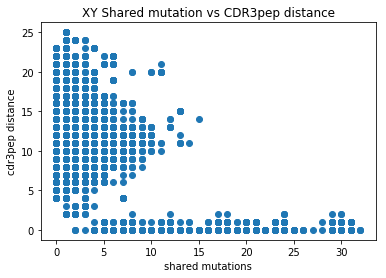

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['Shared mutations'], df['cdr3_distance'])
plt.title("XY Shared mutation vs CDR3pep distance")
plt.xlabel('shared mutations')
plt.ylabel('cdr3pep distance')
fig.show()

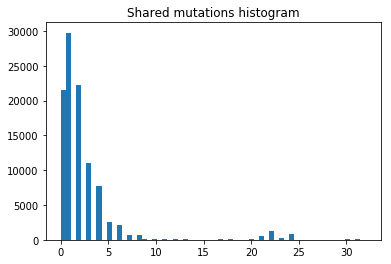

In [7]:
plt.hist(df['Shared mutations'], bins=60)
plt.title("Shared mutations histogram")
plt.show()

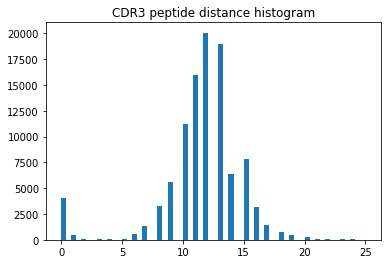

In [8]:
plt.hist(df['cdr3_distance'], bins=60)
plt.title("CDR3 peptide distance histogram")
plt.show()

## Check the nr of shared mutations between close CDR3s and distant CDR3s

In [9]:
df_close = df[df['cdr3_distance'] < 5]
df_distant = df[df['cdr3_distance'] >= 5]

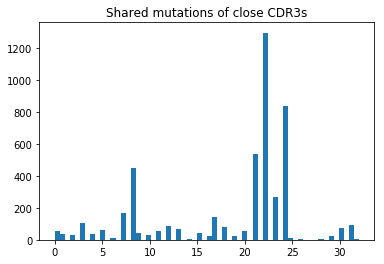

In [10]:
plt.hist(df_close['Shared mutations'], bins=60)
plt.title("Shared mutations of close CDR3s")
plt.show()

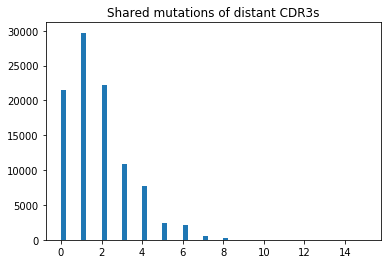

In [11]:
plt.hist(df_distant['Shared mutations'], bins=60)
plt.title("Shared mutations of distant CDR3s")
plt.show()

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


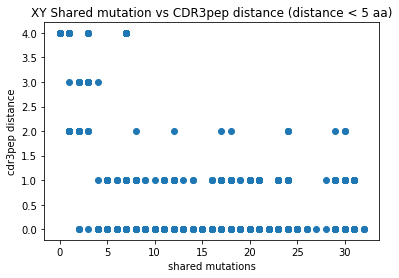

In [12]:
fig, ax = plt.subplots()
ax.scatter(df_close['Shared mutations'], df_close['cdr3_distance'])
plt.title("XY Shared mutation vs CDR3pep distance (distance < 5 aa)")
plt.xlabel('shared mutations')
plt.ylabel('cdr3pep distance')
fig.show()

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


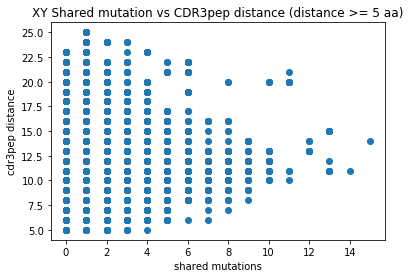

In [13]:
fig, ax = plt.subplots()
ax.scatter(df_distant['Shared mutations'], df_distant['cdr3_distance'])
plt.title("XY Shared mutation vs CDR3pep distance (distance >= 5 aa)")
plt.xlabel('shared mutations')
plt.ylabel('cdr3pep distance')
fig.show()